**XG BOOST MODELLING**

**Background:** 
The Bank Account Dataset comprises of bank account opening fraud tabular datasets. The purpose of this dataset is to predict the customers having a high probability of fraud while opening a bank account. We will design a classification model to classify the customers as fraudulent or non-fraudulent.

**Data Dictionary:**
* Fraud_bool (binary) – 0 if the applicant is not fraudulent and 1 if the applicant is fraudulent
* Income (numeric) – Annual Income of the applicant
* Name_email_similarity (numeric) – Similarity between applicant’s name and email. Ranges between (0, 1).
* Prev_address_months_count (numeric) – Count of months of stay in applicants’ previous residence.
* Currents_months_count (numeric) – count of months in applicant’s current address.
* Customer_age (numeric) – applicants age in years rounded to the decade
* Days_since_request (numeric) – Number of days passed since application was done. Ranges between (0,79) days.
* Intended_balcon_amount (numeric) – initial amount transferred for application.
* Payment_type (categorical) – Credit payment plan type. 5 possible values.
* Zip_count_4w (numeric) – number of applicants in the same zip code in last 4 weeks.
* Velocity_6h (numeric) – avg number of applicants/hr in the last 6 hours
* Velocity_24h (numeric) - avg number of applicants/hr in the last 24 hours.
* Velocity_4w (numeric) - avg number of applicants/hr in the last 4 weeks.
* Bank_branch_count_8w (numeric) – Number of total applicants in the selected branch in last 8 weeks.
* Date_of_birth_distinct_emails_4w (numeric) – Number of emails for applicants with same date of birth in last 4 weeks.
* Employment status (categorical) – Employment status of the applicant. 7 values.
* Credit_risk_score (numeric) – Internal score of application risk.
* Email_is_free (binary) – Domain of application email (free or paid).
* Housing status (categorical) – Current residential status of applicant. 7 values.
* Phone_home_valid (binary)- validity of provided home phone.
* Phone_mobile_valid (binary)- validity of provided mobile phone.
* Bank_months_count (numeric) – How old is previous account in months.
* Has_other_cards (binary) – If applicant has other cards from same bank.
* Proposed_credit_limit (numeric) – Applicants proposed credit limit.
* Foreign_request (binary) – If origin of country is different from bank’s country.
* Source (categorical) – Online source of application, internet browser or teleapp.
* Session_length_in_minutes (numeric) – Length of user session in banking website in minutes.
* Device_os (categorical) – operating of system of device that made request.
* Keep_alive_session (binary) – user option on session logout.
* Device_distinct_emails (numeric) – number of distinct emails in banking website from the used device in last 8 weeks.
* Device_fraud_count (numeric) – Number of fraudulent applications with used device.
* Month (numeric) – Month where the application was made.








In [1]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Reading the base file for bank accounts data set
banks = pd.read_csv('bank_account.csv')

In [4]:
# checking the columns 

banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [5]:
banks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fraud_bool,1000000.0,0.011029,0.104438,0.000000e+00,0.000000,0.000000,0.000000,1.000000
income,1000000.0,0.562696,0.290343,1.000000e-01,0.300000,0.600000,0.800000,0.900000
name_email_similarity,1000000.0,0.493694,0.289125,1.434550e-06,0.225216,0.492153,0.755567,0.999999
prev_address_months_count,1000000.0,16.718568,44.046230,-1.000000e+00,-1.000000,-1.000000,12.000000,383.000000
current_address_months_count,1000000.0,86.587867,88.406599,-1.000000e+00,19.000000,52.000000,130.000000,428.000000
customer_age,1000000.0,33.689080,12.025799,1.000000e+01,20.000000,30.000000,40.000000,90.000000
days_since_request,1000000.0,1.025705,5.381835,4.036860e-09,0.007193,0.015176,0.026331,78.456904
intended_balcon_amount,1000000.0,8.661499,20.236155,-1.553055e+01,-1.181488,-0.830507,4.984176,112.956928
zip_count_4w,1000000.0,1572.692049,1005.374565,1.000000e+00,894.000000,1263.000000,1944.000000,6700.000000
velocity_6h,1000000.0,5665.296605,3009.380665,-1.706031e+02,3436.365848,5319.769349,7680.717827,16715.565404


**EXPLORATORY DATA ANALYSIS**

**DATA CLEANING and PREPROCESSING :**

In [6]:
# Handling Missing values
banks.isnull().sum()


fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

There are no missing values in the dataset

There are some negative and invalid values in some of the columns that needs to be handled

In [22]:
# fixing invalid values by replacing them with the median

columns_to_fix = [
    'prev_address_months_count',
    'current_address_months_count',
    'intended_balcon_amount',
    'date_of_birth_distinct_emails_4w',
    'credit_risk_score',
    'bank_months_count',
    'velocity_6h',
    'velocity_24h',
    'velocity_4w',
    'device_distinct_emails_8w'
]


for col in columns_to_fix:
    median_val = banks.loc[banks[col] >= 0, col].median()
    banks[col] = banks[col].apply(lambda x: median_val if x < 0 else x)





In [23]:
# checking if the values are fixed
banks[columns_to_fix].describe().transpose()


,count,mean,std,min,25%,50%,75%,max
prev_address_months_count,1000000.0,40.981727,31.425449,5.000000,34.000000,34.000000,34.000000,231.000000
current_address_months_count,1000000.0,86.745564,88.012383,0.000000,20.000000,53.000000,130.000000,370.000000
intended_balcon_amount,1000000.0,33.467898,11.728653,0.000054,32.433701,32.433701,32.433701,100.826524
date_of_birth_distinct_emails_4w,1000000.0,9.473470,4.936385,0.000000,6.000000,9.000000,13.000000,23.000000
credit_risk_score,1000000.0,133.139118,65.942659,0.000000,86.000000,124.000000,178.000000,305.000000
bank_months_count,1000000.0,14.897417,9.959287,1.000000,5.000000,15.000000,25.000000,31.000000
velocity_6h,1000000.0,5658.044286,2987.056186,0.651202,3436.811650,5319.876977,7680.717827,13932.187847
velocity_24h,1000000.0,4766.850279,1471.199322,1300.307314,3593.179135,4749.921161,5752.574191,8597.047788
velocity_4w,1000000.0,4855.902983,918.947473,2825.748405,4268.368423,4913.436941,5488.083356,6779.328391
device_distinct_emails_8w,1000000.0,1.019030,0.176669,0.000000,1.000000,1.000000,1.000000,2.000000


All the negative values are replaced by the median values of that column

**Handling outliers**

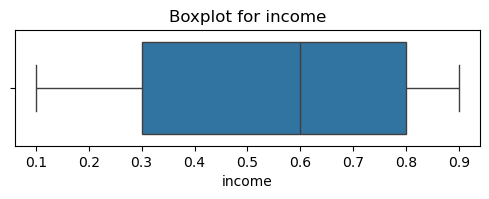

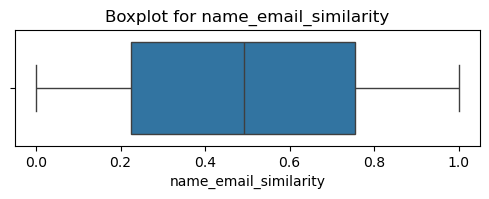

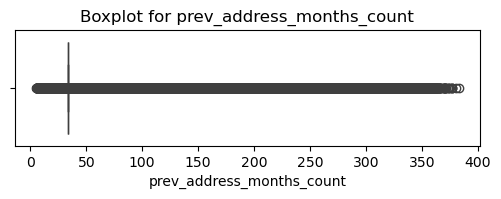

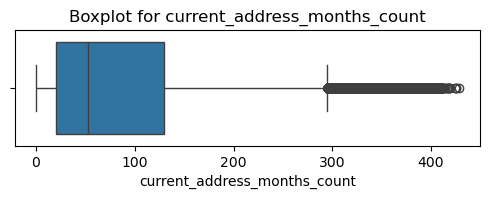

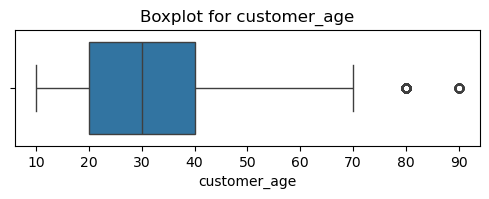

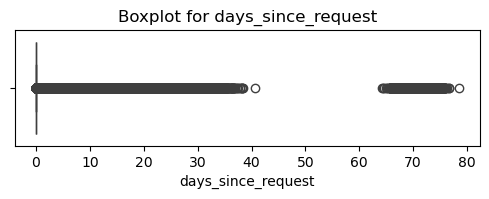

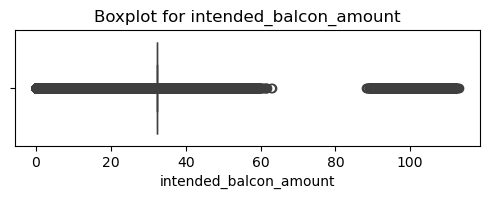

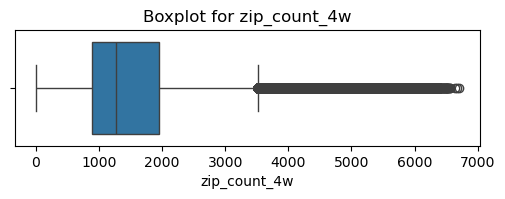

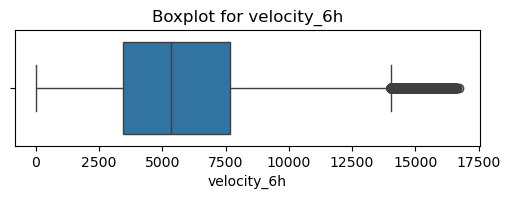

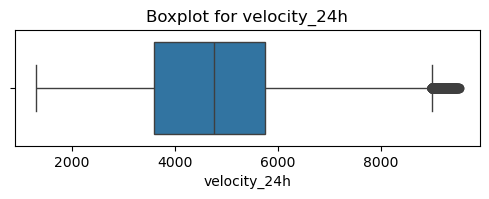

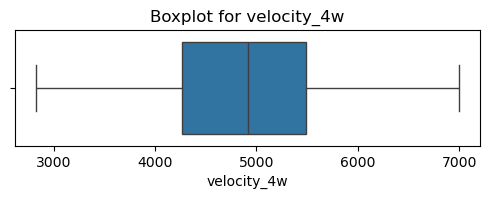

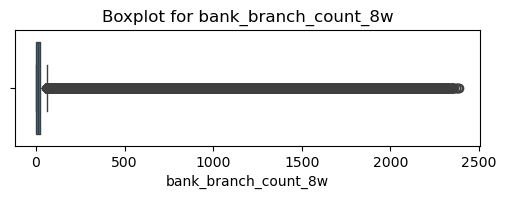

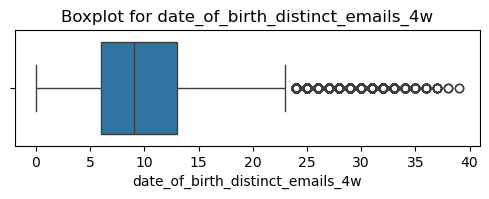

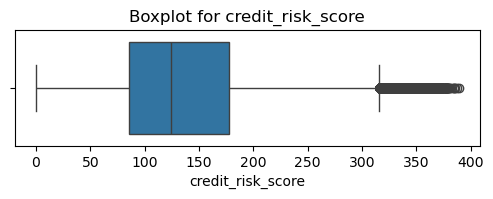

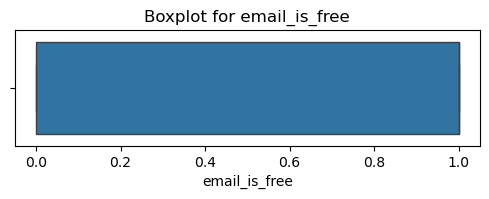

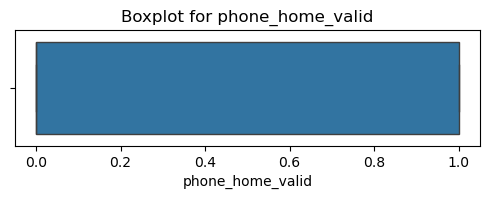

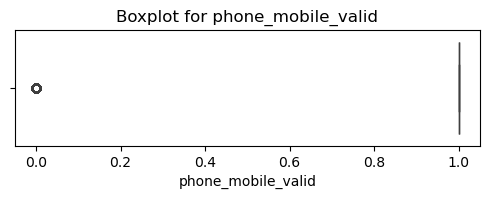

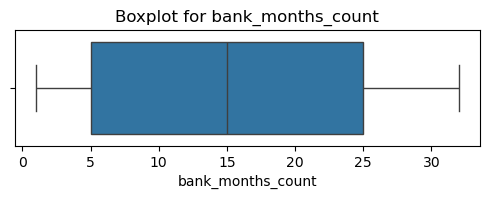

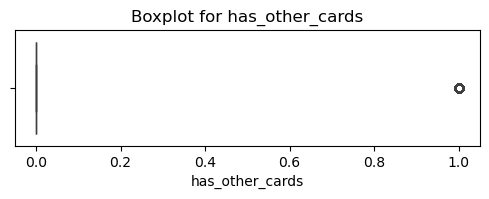

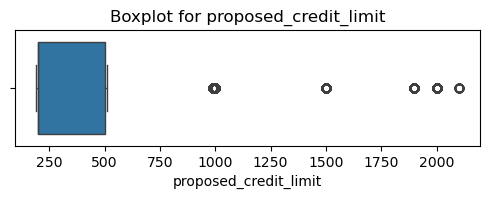

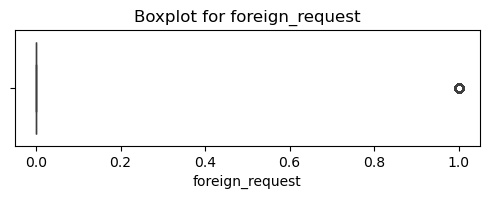

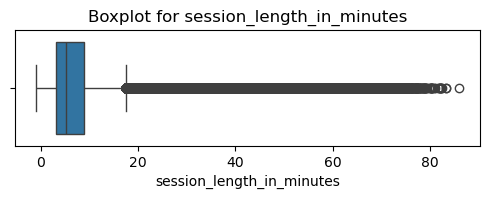

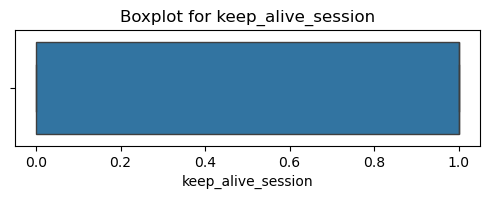

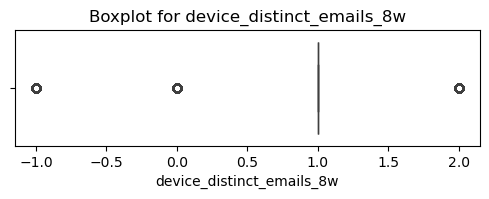

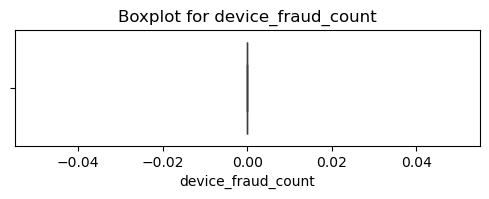

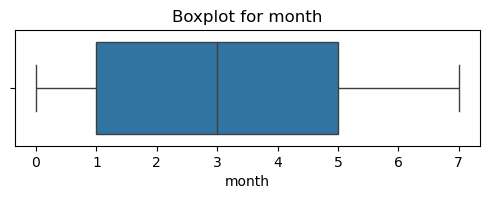

In [13]:
# Box plot for all numeric columns to check for outliers

numeric_cols = banks.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = [col for col in numeric_cols if col != 'fraud_bool'] 

for col in numeric_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=banks[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


* The income data is symmetrically distributed and needs no handling
* The name_email_similarity data ranges between 0 to 1 and is well spread. Needs no handling.
* The customer_age data looks good.
* The prev_address_months_count data has extreme right tail and many high value outliers > 250 months. Needs handling.
* The days_since_request data shows some outliers where the number of days>60. Needs handling.
* The intended_balcon_amount, zip_count_4w, velocity columns, bank_branch_count_8w, date_of_birth_emails_4w, credit_risk_score,bank_months_count,  proposed_credit_limit, session_length_minutes,device_distinct_emails_8w all have many extreme outliers and needs handling.
* This can be done by capping at 99th percentile that will reduce the skewness without deleting the data.
 


In [14]:
# Handling all the columns with outliers by capping at 99th percentile

outlier_columns = [
    'prev_address_months_count',
    'current_address_months_count',
    'days_since_request',
    'intended_balcon_amount',
    'zip_count_4w',
    'velocity_6h',
    'velocity_24h',
    'velocity_4w',
    'bank_branch_count_8w',
    'date_of_birth_distinct_emails_4w',
    'credit_risk_score',
    'bank_months_count',
    'proposed_credit_limit',
    'session_length_in_minutes',
    'device_distinct_emails_8w'
]



for col in outlier_columns:
    cap_value = banks[col].quantile(0.99)
    banks[col] = np.where(banks[col] > cap_value, cap_value, banks[col])
    print(f"{col}: Capped at 99th percentile = {cap_value:.2f}")

prev_address_months_count: Capped at 99th percentile = 231.00
current_address_months_count: Capped at 99th percentile = 370.00
days_since_request: Capped at 99th percentile = 22.00
intended_balcon_amount: Capped at 99th percentile = 100.83
zip_count_4w: Capped at 99th percentile = 4970.00
velocity_6h: Capped at 99th percentile = 13932.19
velocity_24h: Capped at 99th percentile = 8597.05
velocity_4w: Capped at 99th percentile = 6779.33
bank_branch_count_8w: Capped at 99th percentile = 1974.00
date_of_birth_distinct_emails_4w: Capped at 99th percentile = 23.00
credit_risk_score: Capped at 99th percentile = 305.00
bank_months_count: Capped at 99th percentile = 31.00
proposed_credit_limit: Capped at 99th percentile = 1500.00
session_length_in_minutes: Capped at 99th percentile = 44.55
device_distinct_emails_8w: Capped at 99th percentile = 2.00


In [15]:
display(banks[outlier_columns].describe().transpose())

,count,mean,std,min,25%,50%,75%,max
prev_address_months_count,1000000.0,40.981727,31.425449,5.000000e+00,34.000000,34.000000,34.000000,231.000000
current_address_months_count,1000000.0,86.745564,88.012383,0.000000e+00,20.000000,53.000000,130.000000,370.000000
days_since_request,1000000.0,0.819491,3.360399,4.036860e-09,0.007193,0.015176,0.026331,21.995666
intended_balcon_amount,1000000.0,33.467898,11.728653,5.428451e-05,32.433701,32.433701,32.433701,100.826524
zip_count_4w,1000000.0,1568.220421,988.595162,1.000000e+00,894.000000,1263.000000,1944.000000,4970.000000
velocity_6h,1000000.0,5658.044286,2987.056186,6.512023e-01,3436.811650,5319.876977,7680.717827,13932.187847
velocity_24h,1000000.0,4766.850279,1471.199322,1.300307e+03,3593.179135,4749.921161,5752.574191,8597.047788
velocity_4w,1000000.0,4855.902983,918.947473,2.825748e+03,4268.368423,4913.436941,5488.083356,6779.328391
bank_branch_count_8w,1000000.0,183.455900,455.939673,0.000000e+00,1.000000,9.000000,25.000000,1974.000000
date_of_birth_distinct_emails_4w,1000000.0,9.473470,4.936385,0.000000e+00,6.000000,9.000000,13.000000,23.000000


This shows that all the extreme outliers in these columns have been replaced by the 99th percentile max values.


**FEATURE ENGINEERING**:

Creating a new column credit_to_income_ratio to detect suspicious high credit relative to income

In [18]:
# credit to income ratio = proposed credit limit/income
# Adding +1 to denominator in case income is zero to avoid division errors
banks['credit_to_income_ratio'] = banks['proposed_credit_limit'] / (banks['income'] + 1e-5)



In [19]:

banks['credit_to_income_ratio'].describe().transpose()


count    1000000.000000
mean        1498.375252
std         2382.413075
min          211.108765
25%          285.710204
50%          666.644445
75%         1999.800020
max        14998.500150
Name: credit_to_income_ratio, dtype: float64





Aggregating device_distinct_emails_8w and date_of_birth_distinct_emails_4w and creating a new column total_distinct_emails where more emails indicates fraud risk.

In [25]:
# creating new  feature total_distinct_emails
banks['total_distinct_emails'] = (
    banks['device_distinct_emails_8w'] + banks['date_of_birth_distinct_emails_4w']
)




In [26]:
banks['total_distinct_emails'].describe().transpose()

count    1000000.000000
mean          10.492500
std            4.937704
min            0.000000
25%            7.000000
50%           10.000000
75%           14.000000
max           25.000000
Name: total_distinct_emails, dtype: float64

Creating a flag feature for address, long_address_flag which creates a binary flag as the length of stay is more than 200 months 

In [28]:
# Creating a binary Flag and checking for flagged cases
banks['long_address_flag'] = (banks['current_address_months_count'] > 200).astype(int)
print(banks['long_address_flag'].value_counts())

long_address_flag
0    887887
1    112113
Name: count, dtype: int64


**DATA ANALYSIS AND VISUALIZATION**

Creating a histogram of credit risk score distributions on top of each other, one for each fraud value

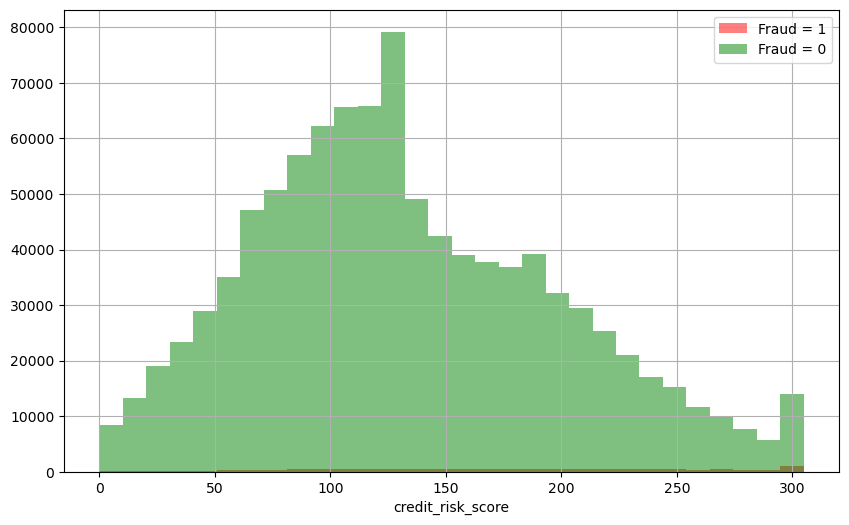

In [30]:


plt.figure(figsize=(10,6))

banks[banks['fraud_bool']==1]['credit_risk_score'].hist(
    alpha=0.5, color='red', bins=30, label='Fraud = 1'
)


banks[banks['fraud_bool']==0]['credit_risk_score'].hist(
    alpha=0.5, color='green', bins=30, label='Fraud = 0'
)

plt.legend()
plt.xlabel('credit_risk_score')
plt.show()


This plot shows that most records have credit risk score between 50 to 200. There are majority non fraud cases and very few fraud cases indicating Class Imbalance. This feature alone is not enough to see the fraud and non fraud separation.

**Repeating the same plot with 'income' column instead of 'credit_risk_score'**

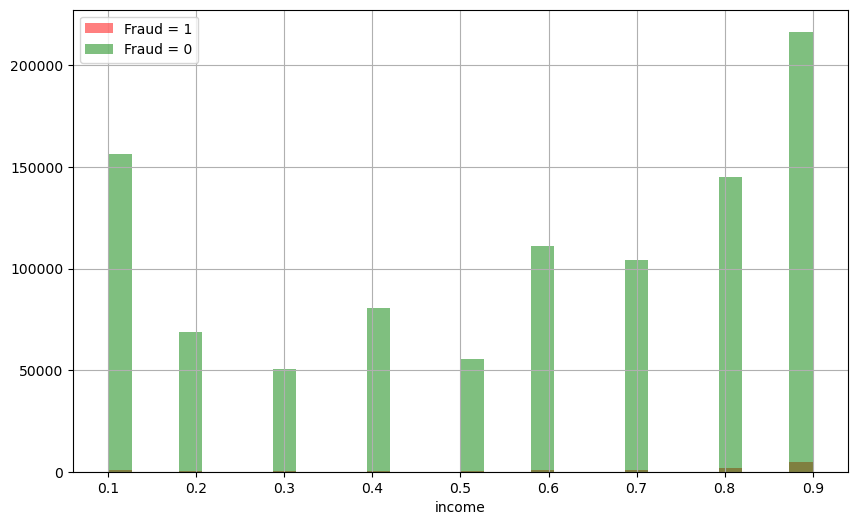

In [36]:


plt.figure(figsize=(10,6))

banks[banks['fraud_bool']==1]['income'].hist(
    alpha=0.5, color='red', bins=30, label='Fraud = 1'
)


banks[banks['fraud_bool']==0]['income'].hist(
    alpha=0.5, color='green', bins=30, label='Fraud = 0'
)

plt.legend()
plt.xlabel('income')
plt.show()


This plot shows that non fraud cases are dominant mostly in all income levels. Fraud cases are few in number towards higher income levels (0.8 - 0.9)

**KDE plot for proposed_credit_limit split by fraud_bool**

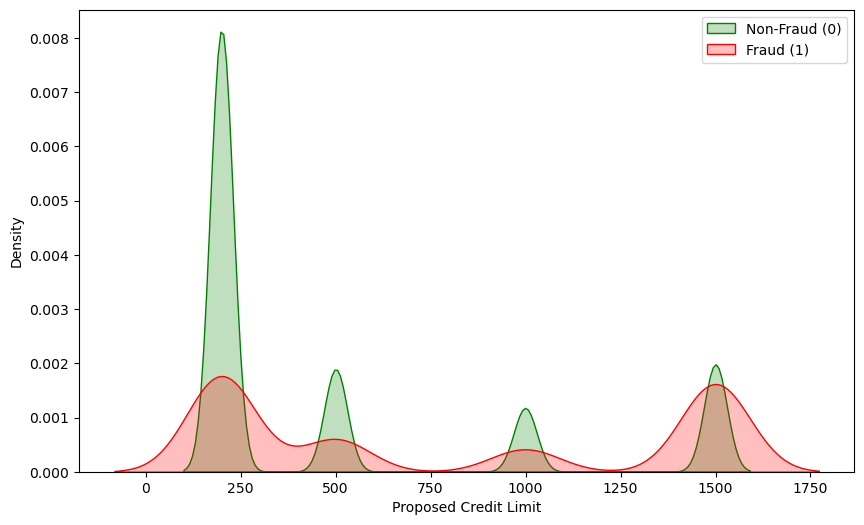

In [38]:


plt.figure(figsize=(10,6))

# for non fraud class
sns.kdeplot(
    data=banks[banks['fraud_bool'] == 0],
    x='proposed_credit_limit',
    fill=True,
    label='Non-Fraud (0)',
    color='green'
)

# for fraud class
sns.kdeplot(
    data=banks[banks['fraud_bool'] == 1],
    x='proposed_credit_limit',
    fill=True,
    label='Fraud (1)',
    color='red'
)


plt.xlabel('Proposed Credit Limit')
plt.ylabel('Density')
plt.legend()
plt.show()


This plot shows the credit limit is spread between 0 to 1800. Non frauds have higher peaks at lower credit limits whereas frauds cases are more uniformly spread with higher bumps at higher credit limits. This is a good visual indicator which implies that fradulent applicants request higher credit limits more frequently.

**Plotting a countplot of all the categorical features grouped by fraud column in one multi plot figure**

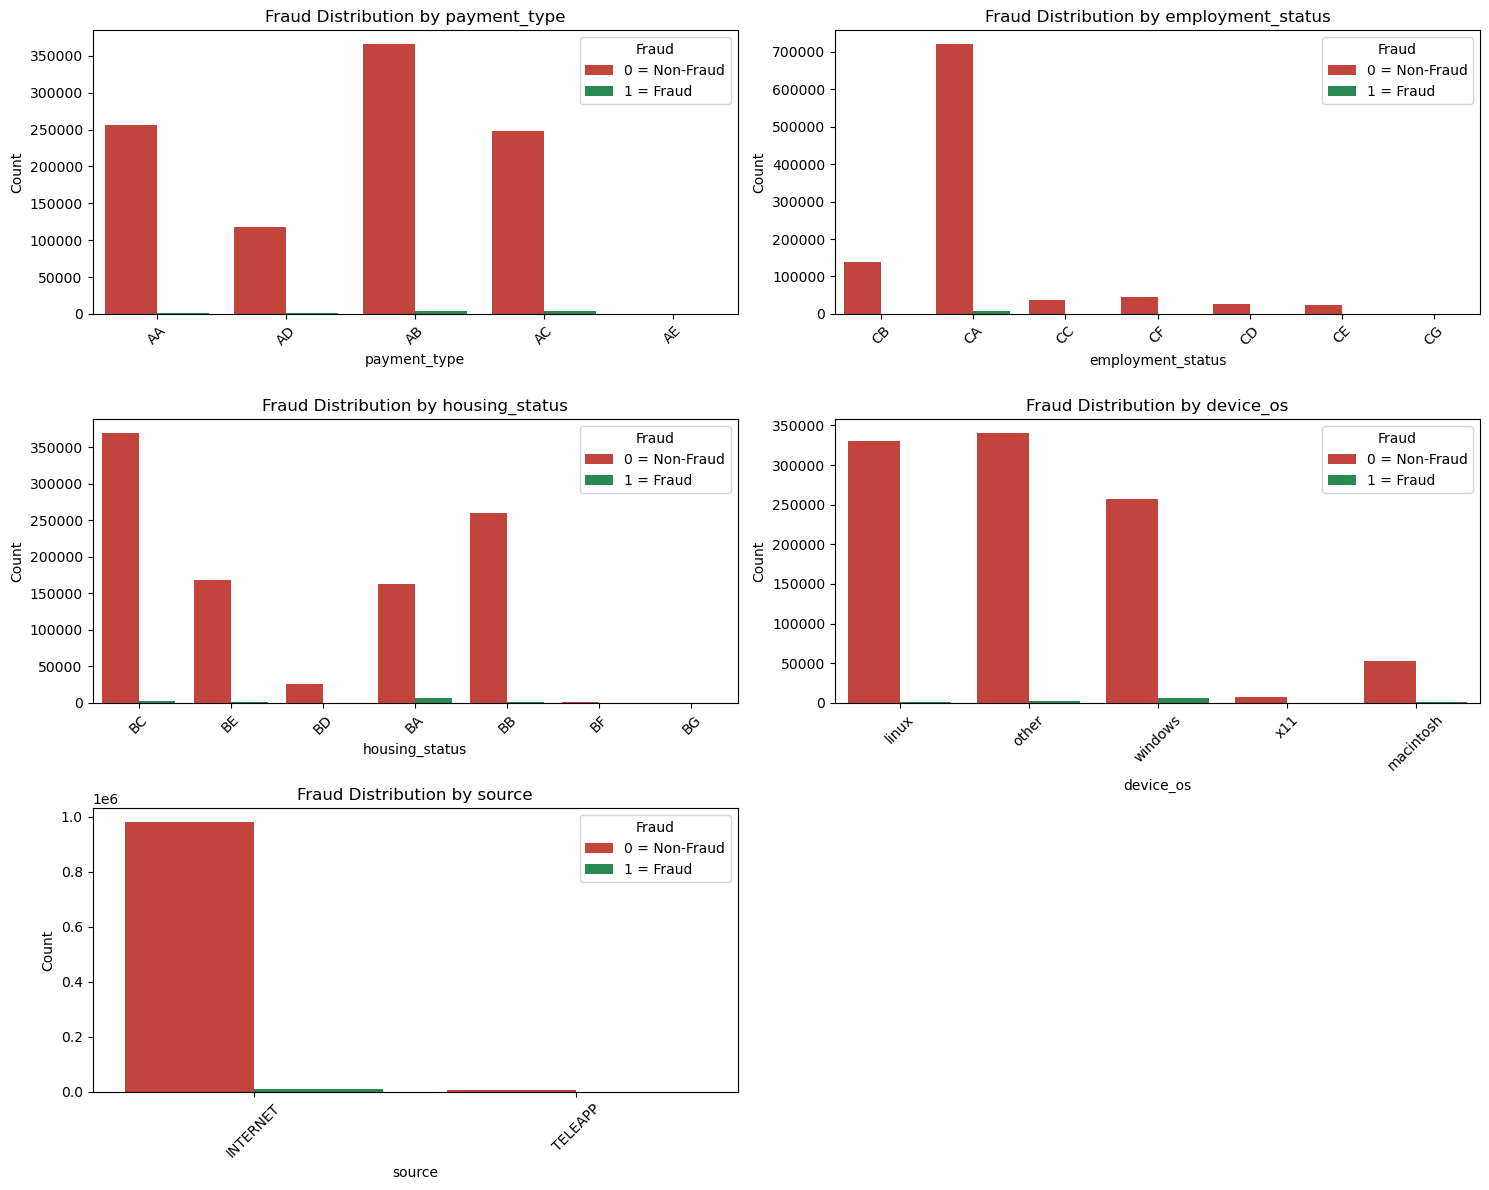

In [44]:


# List of categorical columns
categorical_cols = ['payment_type', 'employment_status', 'housing_status', 'device_os', 'source']


plt.figure(figsize=(15, 12))

for idx, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, idx)
    sns.countplot(data=banks, x=col, hue='fraud_bool', palette=['#d73027', '#1a9850'])
    plt.title(f'Fraud Distribution by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Fraud', labels=['0 = Non-Fraud', '1 = Fraud'])
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


This plot shows that certain categories have higher fraud rate when compared to other categories such as certain payment types have higher fraud risk than others, similarly certain employment categories have higher risk than others

**Creating joint plots for Credit_to_income_ratio vs Proposed credit limit to establish the correlation between them**

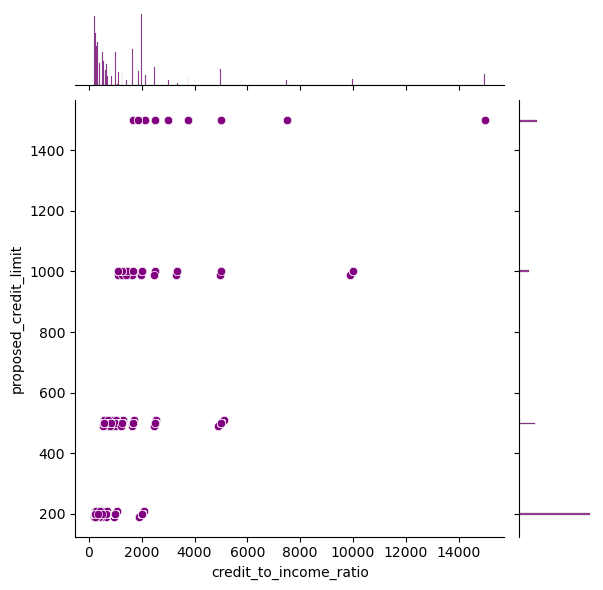

In [53]:


# Jointplot for Credit to income ratio vs 
sns.jointplot(x='credit_to_income_ratio',y='proposed_credit_limit',data=banks,color='purple')
plt.show()




Horizontal bands in this plot indicates that many applicants request common credit limits. Credit to income ratio is right skewed with extreme values. 
Very high credit to income ratios can be fraud indicators. There is no correlation between the two.

Plotting lmplot to find the correlation between credit to income ratio and proposed credit limit with hue as employment status for fraud and non fraud cases

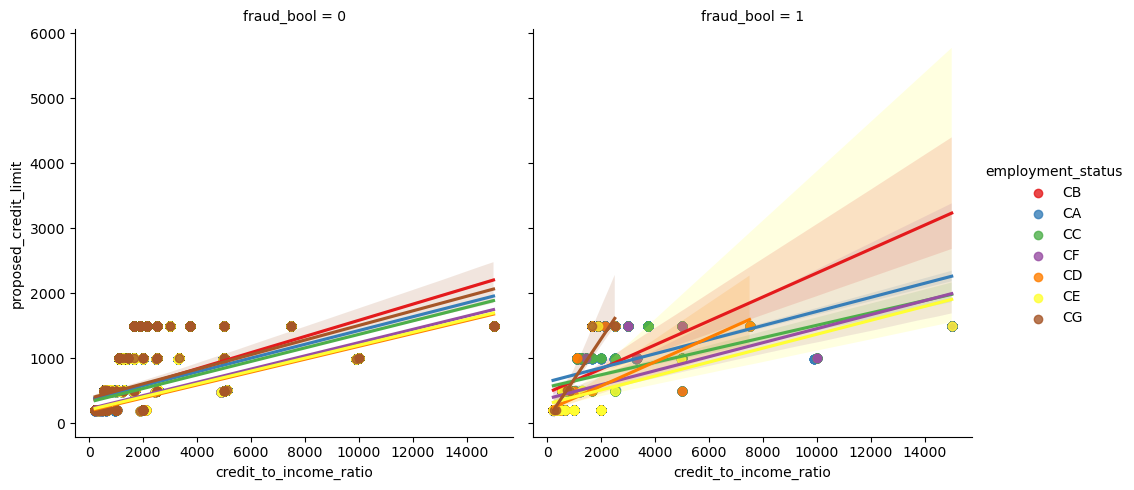

In [59]:
sns.lmplot(
    x="credit_to_income_ratio", y="proposed_credit_limit",
    data=banks, hue="employment_status", col="fraud_bool",
    palette="Set1"
)
plt.show()


Most non fraud cases have lower credit to income ratios and higher credit limits are given for low to moderate credit to income ratios.
For most fraudulent cases, credit to income ratios are high even for low credit limits.
Certain employment statuses such as CE and CC appear more in Fraud cases.

**Preparing the data for modelling**

In [61]:
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 35 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  float64
 4   current_address_months_count      1000000 non-null  float64
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  float64
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

**There are some categorical columns which needs to be transformed using dummy variables**

In [63]:
# creating a list of categorical columns
cat_feats = ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']
# creating a final dataframe
final_data = pd.get_dummies(banks, columns=cat_feats, drop_first=True)
# checking the final data structure
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 51 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  float64
 4   current_address_months_count      1000000 non-null  float64
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   zip_count_4w                      1000000 non-null  float64
 9   velocity_6h                       1000000 non-null  float64
 10  velocity_24h                      1000000 non-null  float64
 11  velocity_4w                       1000

**Train Test Split**

Splitting the data into train and test datasets

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X = final_data.drop('fraud_bool', axis=1)
y = final_data['fraud_bool']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

**Training XGBoost Model**

* Creating an instance of XGBoost classifier and fit on to our training dataset 
* Introducing hyper parameter tuning to improve model perfomance as there is high class imbalance in the dataset 
* Finding the best combination of hyperparameters 

In [84]:
from sklearn.model_selection import RandomizedSearchCV # introducing RandomizedsearchCV for hyperparameter tuning
from xgboost import XGBClassifier

scale = (y_train == 0).sum() / (y_train == 1).sum() # handling class imbalance

param_grid = {
    'max_depth': [3, 5, 7, 9],                     # controls tree depth
    'learning_rate': [0.01, 0.05, 0.1, 0.2],       # defines learning rate
    'n_estimators': [200, 400, 600],               # Number of trees
    'subsample': [0.6, 0.8, 1.0],                  # defines percentage of rows randomly selected per tree
    'colsample_bytree': [0.6, 0.8, 1.0],           # defines percentage of features selected per tree
    'scale_pos_weight': [scale]                    # handles class imbalance
}

xgb = XGBClassifier(n_jobs=-1, random_state=101)  # fixed seed for reproducibility

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=25,                                    # number of random combinations to try
    scoring='recall',                             # focus on recall (fraud detection)
    cv=3,                                         # uses 3 fold cross validation to validate each combination
    verbose=2,                                    # shows training progress
    n_jobs=-1                                     # parallel computation for faster training
)

random_search.fit(X_train, y_train)             # trains 75 models ( 25 parameter sets * 3 folds)


Fitting 3 folds for each of 25 candidates, totalling 75 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=-1,
                                           num_parallel_tree=None, ...),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 9],
                                        'n_estimators': [200, 400, 600],
                                        'scale_pos_weight': [89.86188992731049],
                                        'subsample': [0.6, 0.8, 1.0]},
                   scoring='recall', verbose=2)

In [85]:
print(random_search.best_params_) # prints the exact hyperparameter combination with highest recall during cross validation
print(random_search.best_score_)  # prints the average recall score across 3 fold CV
best_model = random_search.best_estimator_ # prints the best model with the best parameters
y_pred = best_model.predict(X_test)


{'subsample': 0.8, 'scale_pos_weight': 89.86188992731049, 'n_estimators': 600, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
0.788681204569055


**Evaluating the Model on Test Data**

In [86]:

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[240563  56112]
 [   675   2650]]
              precision    recall  f1-score   support

           0       1.00      0.81      0.89    296675
           1       0.05      0.80      0.09      3325

    accuracy                           0.81    300000
   macro avg       0.52      0.80      0.49    300000
weighted avg       0.99      0.81      0.89    300000



* Recall for fradulent cases is 80% that means the model is able to detect 80% of the fraud cases.
* Precision is 5% for fradulent cases that means out of 100 cases flagged as fraud, 5 are actually fraud and 95 are false alarms.
* This is because the data is highly imabalanced and the fraud rate is <1%.
* Accuracy is of less importance due to class imbalance.

**Feature Importance**

<Figure size 1000x600 with 0 Axes>

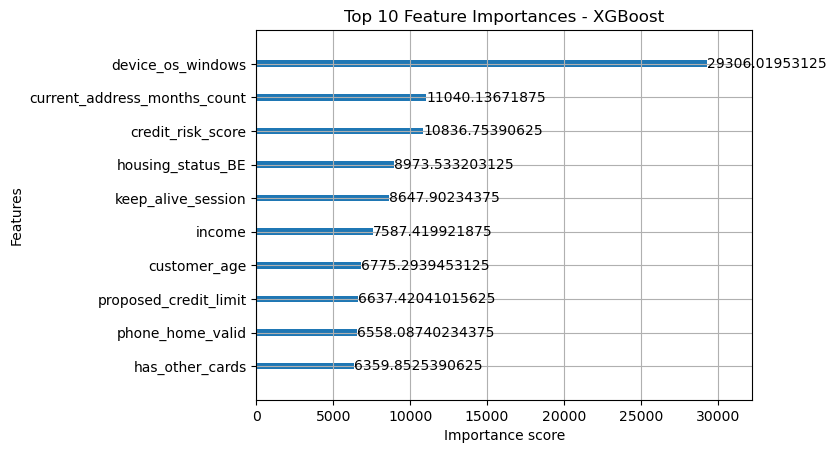

In [90]:
from xgboost import plot_importance
plt.figure(figsize=(10,6))
plot_importance(best_model, max_num_features=10, importance_type='gain')  
plt.title("Top 10 Feature Importances - XGBoost")
plt.show()


* This shows that devices with windows OS are highly indicative of fraud.
* Less stability at current address correlates with fraud risk.
* Credit risk score plays an important role in identifying frauds.
* Income level can discriminate between fraud and non fraud profiles.
* Age contributes moderately to fraud detection.
* Customers with multiple cards show different fraud patterns.

In [2]:

!pip freeze > requirements.txt

# 1) save your trained XGBoost model (Python cell)


In [3]:
import xgboost as xgb
# suppose you have `bst` or `model`
# best: JSON (portable) or .ubj (fast). avoid huge pickles if you can.
bst.save_model("xgb_model.json")        # or: bst.save_model("xgb_model.ubj")


NameError: name 'bst' is not defined